#**BTC Price Prediction**

**IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

**DATASET**

In [2]:
d1 = pd.read_csv('BTC-USD Training Data - 1st Jan 2016 to 1st Jan 2022.csv')                    
d2 = pd.read_csv('BTC-USD Out of Time Testing 1st Jan 2022 to 4th Feb 2022.csv')  
btc_input_df = pd.concat([d1, d2], ignore_index=True)
btc_input_df = btc_input_df.dropna()
btc_input_df                                                    #Final dataset after combining Training Data and Test Data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600
...,...,...,...,...,...,...,...
2223,2022-01-31,37920.281250,38647.261719,36733.574219,38483.125000,38483.125000,20734730465
2224,2022-02-01,38481.765625,39115.132813,38113.664063,38743.273438,38743.273438,20288500328
2225,2022-02-02,38743.714844,38834.617188,36832.730469,36952.984375,36952.984375,19155189416
2226,2022-02-03,36944.804688,37154.601563,36375.539063,37154.601563,37154.601563,18591534769


In [3]:
d2.shape

(35, 7)

In [4]:
btc_input_df.shape

(2228, 7)

In [5]:
btc_input_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2.228000e+03
mean,13445.026206,13806.843200,13043.509117,13460.158516,13460.158516,1.774999e+10
std,16721.478048,17170.695832,16198.653157,16723.528378,16723.528378,2.079395e+10
min,365.072998,374.950012,354.914001,364.330994,364.330994,2.851400e+07
25%,2676.954956,2763.644959,2576.104980,2670.775024,2670.775024,1.234932e+09
50%,7468.564941,7637.985108,7324.726075,7476.364991,7476.364991,9.833027e+09
75%,11557.909180,11880.472656,11290.747070,11586.823242,11586.823242,2.898932e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [6]:
btc_input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2228 entries, 0 to 2227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2228 non-null   object 
 1   Open       2228 non-null   float64
 2   High       2228 non-null   float64
 3   Low        2228 non-null   float64
 4   Close      2228 non-null   float64
 5   Adj Close  2228 non-null   float64
 6   Volume     2228 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 122.0+ KB


In [7]:
btc_input_df_datetype = btc_input_df.astype({'Date': 'datetime64'})
btc_input_df_datetype

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600
...,...,...,...,...,...,...,...
2223,2022-01-31,37920.281250,38647.261719,36733.574219,38483.125000,38483.125000,20734730465
2224,2022-02-01,38481.765625,39115.132813,38113.664063,38743.273438,38743.273438,20288500328
2225,2022-02-02,38743.714844,38834.617188,36832.730469,36952.984375,36952.984375,19155189416
2226,2022-02-03,36944.804688,37154.601563,36375.539063,37154.601563,37154.601563,18591534769


In [8]:
btc_input_df_datetype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2228 entries, 0 to 2227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2228 non-null   datetime64[ns]
 1   Open       2228 non-null   float64       
 2   High       2228 non-null   float64       
 3   Low        2228 non-null   float64       
 4   Close      2228 non-null   float64       
 5   Adj Close  2228 non-null   float64       
 6   Volume     2228 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 122.0 KB


In [9]:
print('Null Values:',btc_input_df_datetype.isnull().values.sum())
print('If any NA values:', btc_input_df_datetype.isnull().values.any())

Null Values: 0
If any NA values: False


In [10]:
btc_input_df_datetype.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2223,2022-01-31,37920.281250,38647.261719,36733.574219,38483.125000,38483.125000,20734730465
2224,2022-02-01,38481.765625,39115.132813,38113.664063,38743.273438,38743.273438,20288500328
2225,2022-02-02,38743.714844,38834.617188,36832.730469,36952.984375,36952.984375,19155189416
2226,2022-02-03,36944.804688,37154.601563,36375.539063,37154.601563,37154.601563,18591534769
2227,2022-02-04,37234.058594,38121.738281,37093.628906,37649.335938,37649.335938,20987750400


In [11]:
btc_input_df_datetype.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


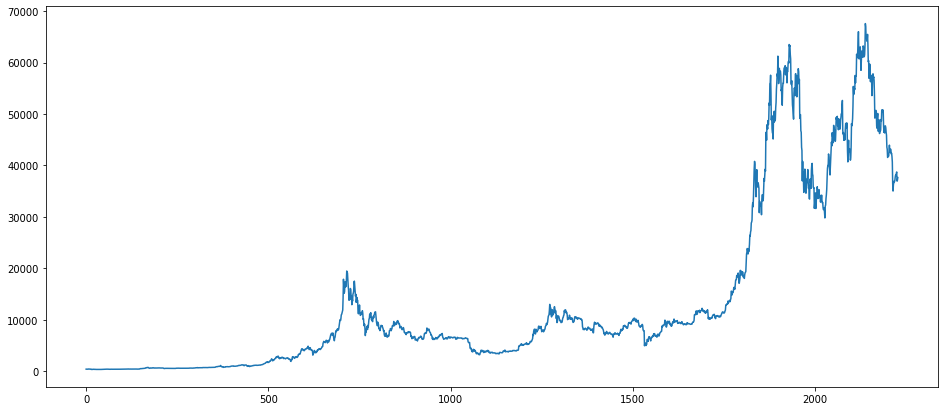

In [12]:
plt.figure(figsize=(16,7))
plt.plot(btc_input_df_datetype['Close'])

**DATA FOR LSTM**

In [13]:
display(btc_input_df_datetype.head())
group = btc_input_df_datetype.groupby('Date')
btc_closing_price_groupby_date = group['Close'].mean()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [14]:
display(btc_closing_price_groupby_date.head())
len(btc_closing_price_groupby_date)

Date
2016-01-01    434.334015
2016-01-02    433.437988
2016-01-03    430.010986
2016-01-04    433.091003
2016-01-05    431.959991
Name: Close, dtype: float64

2227

**TRAIN TEST SPLIT**

In [15]:
prediction_days = 35
df_train= btc_closing_price_groupby_date[:len(btc_closing_price_groupby_date)-prediction_days].values.reshape(-1,1)
df_test= btc_closing_price_groupby_date[len(btc_closing_price_groupby_date)-prediction_days:].values.reshape(-1,1)

In [16]:
df_test.shape


(35, 1)

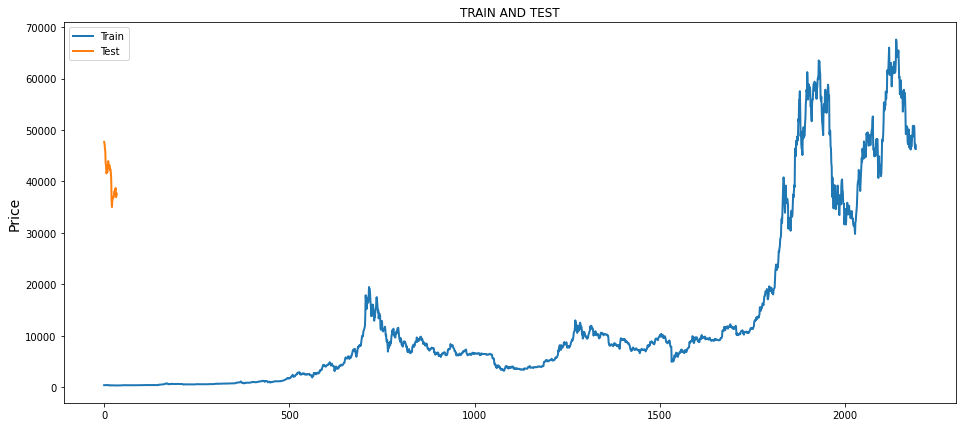

In [17]:
chosen_col = 'Close'
fig, ax = plt.subplots(1, figsize=(16, 7))
ax.plot(df_train, label='Train', linewidth=2)
ax.plot(df_test, label='Test', linewidth=2)
ax.set_ylabel('Price', fontsize=14)
ax.set_title('TRAIN AND TEST')
ax.legend()

**MIN MAX SCALING OF DATA**

In [18]:
scaler_train = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler_train.fit_transform(df_train)

scaler_test = MinMaxScaler(feature_range=(0, 1))
scaled_test = scaler_test.fit_transform(df_test)

In [19]:
def dataset_generator_lstm(dataset, look_back=5): 
    dataX, dataY = [], []
    
    for i in range(len(dataset) - look_back):
        window_size_x = dataset[i:(i + look_back), 0]
        dataX.append(window_size_x)
        dataY.append(dataset[i + look_back, 0]) 
    return np.array(dataX), np.array(dataY)

trainX, trainY = dataset_generator_lstm(scaled_train)
testX, testY = dataset_generator_lstm(scaled_test)

print("trainX:", trainX.shape)
print("trainY:", trainY.shape)
print("testX:", testX.shape)
print("testY:", testY.shape)

trainX: (2187, 5)
trainY: (2187,)
testX: (30, 5)
testY: (30,)


In [20]:
print("trainX:", trainX)
print("trainY: ", trainY)
print("testY: ", testX)
print("testY", testY)

trainX: [[0.00104167 0.00102834 0.00097734 0.00102318 0.00100635]
 [0.00102834 0.00097734 0.00102318 0.00100635 0.00096386]
 [0.00097734 0.00102318 0.00100635 0.00096386 0.00139455]
 ...
 [0.75083318 0.74499506 0.7506445  0.74812826 0.70271979]
 [0.74499506 0.7506445  0.74812826 0.70271979 0.68569446]
 [0.7506445  0.74812826 0.70271979 0.68569446 0.69660795]]
trainY:  [0.00096386 0.00139455 0.00132285 ... 0.68569446 0.69660795 0.68363701]
testY:  [[1.         0.97301054 0.9029203  0.85863158 0.67465032]
 [0.97301054 0.9029203  0.85863158 0.67465032 0.64240821]
 [0.9029203  0.85863158 0.67465032 0.64240821 0.51575239]
 [0.85863158 0.67465032 0.64240821 0.51575239 0.5296613 ]
 [0.67465032 0.64240821 0.51575239 0.5296613  0.5436983 ]
 [0.64240821 0.51575239 0.5296613  0.5436983  0.53656052]
 [0.51575239 0.5296613  0.5436983  0.53656052 0.60882293]
 [0.5296613  0.5436983  0.53656052 0.60882293 0.70468198]
 [0.5436983  0.53656052 0.60882293 0.70468198 0.5974229 ]
 [0.53656052 0.60882293 0.7

In [21]:
trainX.shape

(2187, 5)

In [22]:
testX.shape

(30, 5)

**RESHAPE trainX AND testX**

In [23]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1 ))
trainX.shape

(2187, 5, 1)

In [24]:
testX.shape

(30, 5, 1)

In [25]:
trainX

array([[[0.00104167],
        [0.00102834],
        [0.00097734],
        [0.00102318],
        [0.00100635]],

       [[0.00102834],
        [0.00097734],
        [0.00102318],
        [0.00100635],
        [0.00096386]],

       [[0.00097734],
        [0.00102318],
        [0.00100635],
        [0.00096386],
        [0.00139455]],

       ...,

       [[0.75083318],
        [0.74499506],
        [0.7506445 ],
        [0.74812826],
        [0.70271979]],

       [[0.74499506],
        [0.7506445 ],
        [0.74812826],
        [0.70271979],
        [0.68569446]],

       [[0.7506445 ],
        [0.74812826],
        [0.70271979],
        [0.68569446],
        [0.69660795]]])

In [26]:
testX

array([[[1.        ],
        [0.97301054],
        [0.9029203 ],
        [0.85863158],
        [0.67465032]],

       [[0.97301054],
        [0.9029203 ],
        [0.85863158],
        [0.67465032],
        [0.64240821]],

       [[0.9029203 ],
        [0.85863158],
        [0.67465032],
        [0.64240821],
        [0.51575239]],

       [[0.85863158],
        [0.67465032],
        [0.64240821],
        [0.51575239],
        [0.5296613 ]],

       [[0.67465032],
        [0.64240821],
        [0.51575239],
        [0.5296613 ],
        [0.5436983 ]],

       [[0.64240821],
        [0.51575239],
        [0.5296613 ],
        [0.5436983 ],
        [0.53656052]],

       [[0.51575239],
        [0.5296613 ],
        [0.5436983 ],
        [0.53656052],
        [0.60882293]],

       [[0.5296613 ],
        [0.5436983 ],
        [0.53656052],
        [0.60882293],
        [0.70468198]],

       [[0.5436983 ],
        [0.53656052],
        [0.60882293],
        [0.70468198],
        [0.59742

In [27]:
trainX.shape[1]

5

In [28]:
trainX.shape[2]

1

In [29]:
regressor = Sequential()
regressor.add(LSTM(units = 128, activation = 'relu',return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 64, input_shape = (trainX.shape[1], trainX.shape[2])))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 128)            66560     
                                                                 
 dropout (Dropout)           (None, 5, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________


In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping                               
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics= ['accuracy'])
checkpoint_path = 'my_best_model.hdf5'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
earlystopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
callbacks = [checkpoint, earlystopping]
history = regressor.fit(trainX, trainY, batch_size = 32, epochs = 600, verbose=1, shuffle=False, validation_data=(testX, testY), callbacks=callbacks)

Epoch 1/600
67/69 [============================>.] - ETA: 0s - loss: 0.0146 - accuracy: 9.3284e-04
Epoch 1: val_loss improved from inf to 0.14046, saving model to my_best_model.hdf5
69/69 [==============================] - 7s 32ms/step - loss: 0.0152 - accuracy: 9.1449e-04 - val_loss: 0.1405 - val_accuracy: 0.0000e+00
Epoch 2/600
67/69 [============================>.] - ETA: 0s - loss: 0.0370 - accuracy: 9.3284e-04
Epoch 2: val_loss improved from 0.14046 to 0.07755, saving model to my_best_model.hdf5
69/69 [==============================] - 1s 16ms/step - loss: 0.0364 - accuracy: 9.1449e-04 - val_loss: 0.0775 - val_accuracy: 0.0000e+00
Epoch 3/600
66/69 [===========================>..] - ETA: 0s - loss: 0.0156 - accuracy: 4.7348e-04
Epoch 3: val_loss improved from 0.07755 to 0.02531, saving model to my_best_model.hdf5
69/69 [==============================] - 1s 19ms/step - loss: 0.0157 - accuracy: 9.1449e-04 - val_loss: 0.0253 - val_accuracy: 0.0333
Epoch 4/600
67/69 [=================

In [31]:
from tensorflow.keras.models import load_model
model_from_saved_checkpoint = load_model(checkpoint_path)

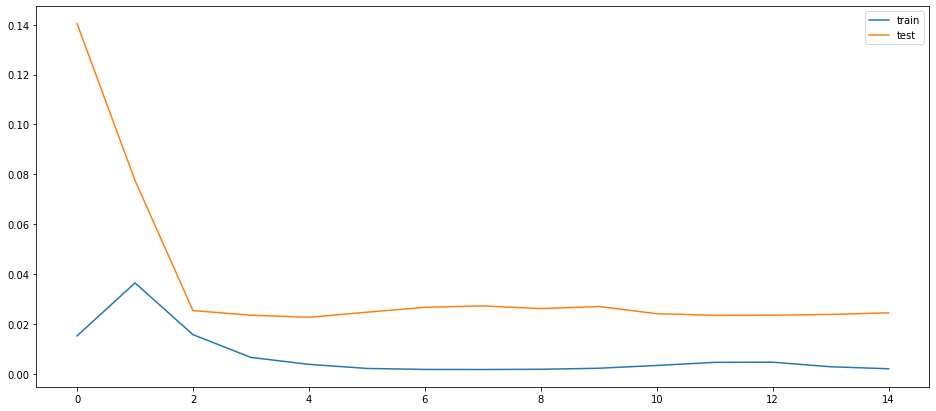

In [32]:
plt.figure(figsize=(16,7))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [33]:
predicted_btc_price_test_data = model_from_saved_checkpoint.predict(testX)
predicted_btc_price_test_data = scaler_test.inverse_transform(predicted_btc_price_test_data.reshape(-1, 1))
test_actual = scaler_test.inverse_transform(testY.reshape(-1, 1))

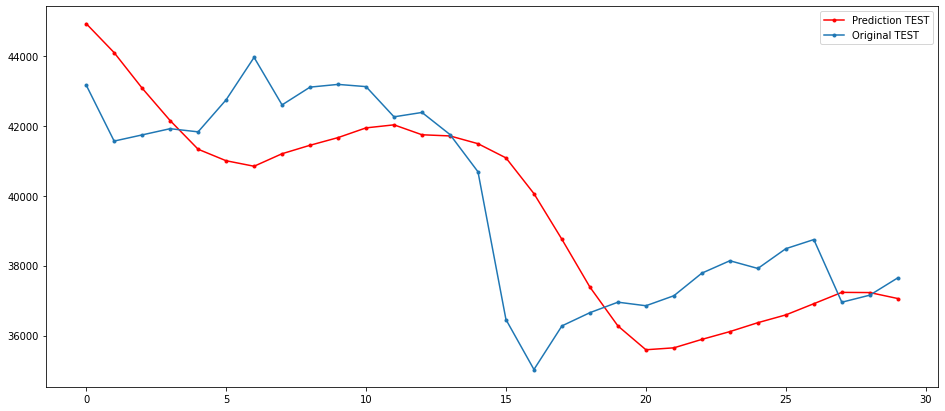

In [34]:
plt.figure(figsize=(16,7))
plt.plot(predicted_btc_price_test_data,"r-",marker='.', label='Prediction TEST')
plt.plot(test_actual, marker='.', label='Original TEST')
plt.legend()
plt.show()

**LSTM PREDICTION**

In [35]:
predicted_btc_price_train_data = model_from_saved_checkpoint.predict(trainX)
predicted_btc_price_train_data = scaler_train.inverse_transform(predicted_btc_price_train_data.reshape(-1, 1))
train_actual = scaler_train.inverse_transform(trainY.reshape(-1, 1))

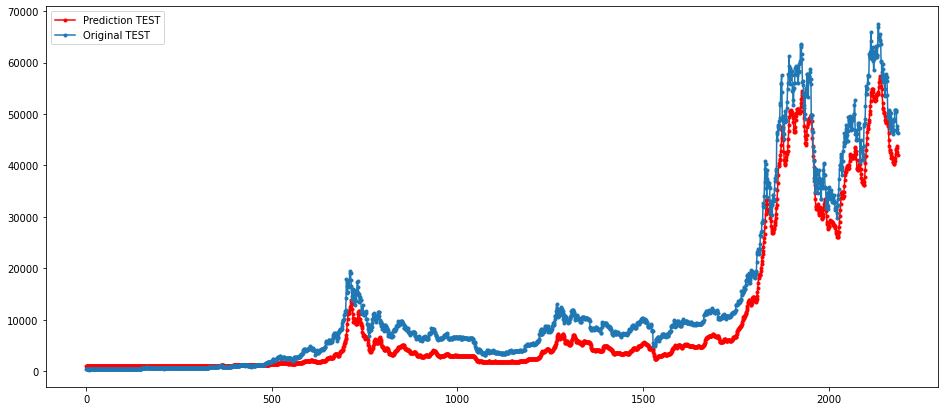

In [36]:
plt.figure(figsize=(16,7))
plt.plot(predicted_btc_price_train_data,"r-",marker='.', label='Prediction TEST')
plt.plot(train_actual, marker='.', label='Original TEST')
plt.legend()
plt.show()

**RMSE TEST AND TRAIN DATA**

In [37]:
rmse_lstm_test = math.sqrt(mean_squared_error(test_actual, predicted_btc_price_test_data))
rmse_lstm_test

1903.839434276712

In [38]:
rmse_lstm_train = math.sqrt(mean_squared_error(train_actual, predicted_btc_price_train_data))
rmse_lstm_train

4312.7681396627795

In [39]:
testX

array([[[1.        ],
        [0.97301054],
        [0.9029203 ],
        [0.85863158],
        [0.67465032]],

       [[0.97301054],
        [0.9029203 ],
        [0.85863158],
        [0.67465032],
        [0.64240821]],

       [[0.9029203 ],
        [0.85863158],
        [0.67465032],
        [0.64240821],
        [0.51575239]],

       [[0.85863158],
        [0.67465032],
        [0.64240821],
        [0.51575239],
        [0.5296613 ]],

       [[0.67465032],
        [0.64240821],
        [0.51575239],
        [0.5296613 ],
        [0.5436983 ]],

       [[0.64240821],
        [0.51575239],
        [0.5296613 ],
        [0.5436983 ],
        [0.53656052]],

       [[0.51575239],
        [0.5296613 ],
        [0.5436983 ],
        [0.53656052],
        [0.60882293]],

       [[0.5296613 ],
        [0.5436983 ],
        [0.53656052],
        [0.60882293],
        [0.70468198]],

       [[0.5436983 ],
        [0.53656052],
        [0.60882293],
        [0.70468198],
        [0.59742

In [40]:
testX.shape

(30, 5, 1)

In [41]:
lookback_period = 5
testX_last_5_days = testX[testX.shape[0] - lookback_period :  ]
testX_last_5_days.shape

(5, 5, 1)

In [42]:
testX_last_5_days

array([[[0.14394675],
        [0.16655268],
        [0.21760111],
        [0.24555875],
        [0.22813079]],

       [[0.16655268],
        [0.21760111],
        [0.24555875],
        [0.22813079],
        [0.27281302]],

       [[0.21760111],
        [0.24555875],
        [0.22813079],
        [0.27281302],
        [0.29336745]],

       [[0.24555875],
        [0.22813079],
        [0.27281302],
        [0.29336745],
        [0.151916  ]],

       [[0.22813079],
        [0.27281302],
        [0.29336745],
        [0.151916  ],
        [0.16784586]]])

In [43]:
predicted_5_days_forecast_price_test_x = []
for i in range(5):  
  predicted_forecast_price_test_x = model_from_saved_checkpoint.predict(testX_last_5_days[i:i+1])
  
  predicted_forecast_price_test_x = scaler_test.inverse_transform(predicted_forecast_price_test_x.reshape(-1, 1))
  
  predicted_5_days_forecast_price_test_x.append(predicted_forecast_price_test_x)
  
print("Forecast for the next 5 Days Beyond the actual trading days ", np.array(predicted_5_days_forecast_price_test_x)) 

Forecast for the next 5 Days Beyond the actual trading days  [[[36590.72]]

 [[36910.64]]

 [[37234.26]]

 [[37228.78]]

 [[37058.49]]]


In [44]:
predicted_5_days_forecast_price_test_x = np.array(predicted_5_days_forecast_price_test_x)
predicted_5_days_forecast_price_test_x.shape

(5, 1, 1)

In [45]:
predicted_btc_price_test_data.shape

(30, 1)

In [46]:
predicted_btc_price_test_data

array([[44915.44 ],
       [44085.363],
       [43070.52 ],
       [42144.316],
       [41324.992],
       [40995.957],
       [40838.41 ],
       [41196.45 ],
       [41438.383],
       [41656.926],
       [41934.965],
       [42021.44 ],
       [41738.06 ],
       [41704.664],
       [41483.29 ],
       [41077.516],
       [40055.965],
       [38749.164],
       [37384.668],
       [36275.11 ],
       [35594.4  ],
       [35649.64 ],
       [35890.84 ],
       [36113.35 ],
       [36368.19 ],
       [36590.72 ],
       [36910.64 ],
       [37234.26 ],
       [37228.78 ],
       [37058.49 ]], dtype=float32)

In [47]:
predicted_5_days_forecast_price_test_x

array([[[36590.72]],

       [[36910.64]],

       [[37234.26]],

       [[37228.78]],

       [[37058.49]]], dtype=float32)

In [48]:
predicted_5_days_forecast_price_test_x = predicted_5_days_forecast_price_test_x.flatten()
predicted_5_days_forecast_price_test_x

array([36590.72, 36910.64, 37234.26, 37228.78, 37058.49], dtype=float32)

In [49]:
predicted_btc_price_test_data = predicted_btc_price_test_data.flatten()
predicted_btc_price_test_data

array([44915.44 , 44085.363, 43070.52 , 42144.316, 41324.992, 40995.957,
       40838.41 , 41196.45 , 41438.383, 41656.926, 41934.965, 42021.44 ,
       41738.06 , 41704.664, 41483.29 , 41077.516, 40055.965, 38749.164,
       37384.668, 36275.11 , 35594.4  , 35649.64 , 35890.84 , 36113.35 ,
       36368.19 , 36590.72 , 36910.64 , 37234.26 , 37228.78 , 37058.49 ],
      dtype=float32)

In [50]:
predicted_btc_test_concatenated = np.concatenate((predicted_btc_price_test_data, predicted_5_days_forecast_price_test_x))
predicted_btc_test_concatenated
predicted_btc_test_concatenated.shape

(35,)

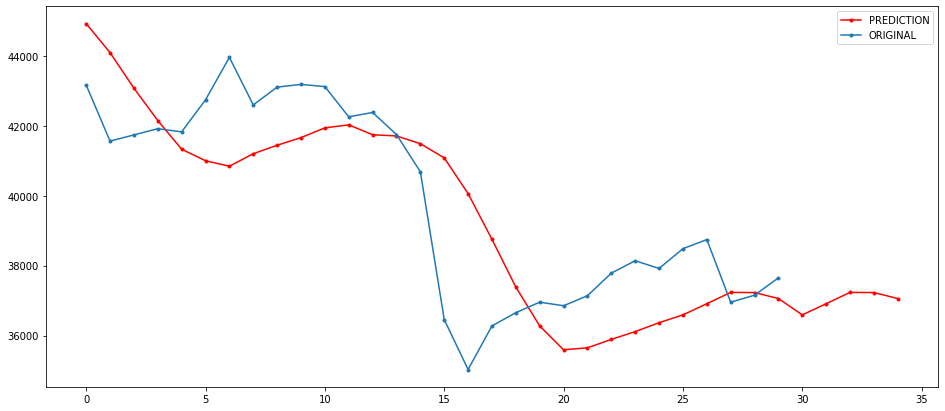

In [51]:
plt.figure(figsize=(16,7))
plt.plot(predicted_btc_test_concatenated,"r-", marker='.', label='PREDICTION')
plt.plot(test_actual, marker='.', label='ORIGINAL')
plt.legend()
plt.show()